#Video Search

###Step 1: Data Preparation
#### Utilize youtube-dl to download videos.Ensure youtube-dl is installed. Extract key frames from each video using "ffmpeg" or "katna".

In [ ]:
!pip uninstall youtube_dl


Found existing installation: youtube-dl 2021.12.17
Uninstalling youtube-dl-2021.12.17:
  Would remove:
    /usr/local/bin/youtube-dl
    /usr/local/etc/bash_completion.d/youtube-dl.bash-completion
    /usr/local/etc/fish/completions/youtube-dl.fish
    /usr/local/lib/python3.10/dist-packages/youtube_dl-2021.12.17.dist-info/*
    /usr/local/lib/python3.10/dist-packages/youtube_dl/*
    /usr/local/share/doc/youtube_dl/README.txt
    /usr/local/share/man/man1/youtube-dl.1
Proceed (Y/n)? y
  Successfully uninstalled youtube-dl-2021.12.17


In [ ]:
!pip install git+https://github.com/ytdl-org/youtube-dl.git@master#egg=youtube_dl

  Cloning https://github.com/ytdl-org/youtube-dl.git (to revision master) to /tmp/pip-install-qwu3fanq/youtube-dl_a9fb16033d6d4fb98715bc96791044be
  Running command git clone --filter=blob:none --quiet https://github.com/ytdl-org/youtube-dl.git /tmp/pip-install-qwu3fanq/youtube-dl_a9fb16033d6d4fb98715bc96791044be
  Resolved https://github.com/ytdl-org/youtube-dl.git to commit 71223bff39551a11b6959a3de2dd9e2f070f3c4f
  Preparing metadata (setup.py) ... done


In [ ]:
import youtube_dl

def download_videos(video_urls, download_path='./videos'):
    ydl_opts = {
        'outtmpl': f'{download_path}/%(title)s.%(ext)s',
        'format': 'best'
    }

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download(video_urls)

video_urls = [
    "https://www.youtube.com/watch?v=ehmsJLZlCZ0",
    "https://www.youtube.com/watch?v=EDap9qxb96k",
    "https://www.youtube.com/watch?v=wkMcWXENCwg",
    "https://www.youtube.com/watch?v=mrL_HQRNviY",
    "https://www.youtube.com/watch?v=0teVWbQPEjA"
    # Add more video URLs
]

download_videos(video_urls)


[youtube] ehmsJLZlCZ0: Downloading webpage
[youtube] ehmsJLZlCZ0: Downloading player d2e656ee
[download] Destination: ./videos/Ep 1_ Travelling through North East India _ Off To Arunachal _ The Journey Begins _ Pasighat.mp4
[download] 100% of 38.91MiB in 00:02
[youtube] EDap9qxb96k: Downloading webpage
[download] Destination: ./videos/My Solo Trip to Antarctica.mp4
[download] 100% of 30.00MiB in 00:00
[youtube] wkMcWXENCwg: Downloading webpage
[download] Destination: ./videos/My Solo Trip to Alaska _ Anchorage to Seward.mp4
[download] 100% of 38.31MiB in 00:03
[youtube] mrL_HQRNviY: Downloading webpage
[download] Destination: ./videos/Finding Secrets Of Kashi 🕉️ _ Vlog 62.mp4
[download] 100% of 25.93MiB in 00:00
[youtube] 0teVWbQPEjA: Downloading webpage
[download] Destination: ./videos/Manali to Rohtang Pass by Road 2022 - The complete Guide to Rohtang.mp4
[download] 100% of 45.55MiB in 00:10


In [ ]:
!pip install ffmpeg


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=5a8fd80ecd471ea08adc134fbf3ab024c8f007ad419704d7f956fc85a343e5c2
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
!pip install katana

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 65.2 MB/s eta 0:00:00


In [ ]:
import ffmpeg

In [ ]:
import os
import subprocess

def extract_key_frames(video_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    video_filename = os.path.basename(video_path)
    video_name, _ = os.path.splitext(video_filename)
    output_pattern = os.path.join(output_folder, f"{video_name}_frame_%03d.png")

    command = [
        'ffmpeg', '-i', video_path,
        '-vf', 'select=eq(pict_type\\,I)',
        '-vsync', 'vfr',
        output_pattern
    ]

    subprocess.run(command)

def process_videos(video_folder, output_folder):
    video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.mkv', '.avi'))]

    for video_file in video_files:
        video_path = os.path.join(video_folder, video_file)
        extract_key_frames(video_path, output_folder)

# Specify your directories
video_folder = './videos'
output_folder = './keyframes'

process_videos(video_folder, output_folder)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 2: Vector Representation
#### 2.1 Extract Embeddings using CLIP from OPENAI.
CLIP embeddings are trained to compare text and images in the same embedding space. This means you can search for images using text input or search for images using an image input.

In [ ]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-zd1wcjeg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-zd1wcjeg
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using c

In [ ]:
import os
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def get_image_embedding(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
    return image_features

image_files = [f"/content/drive/MyDrive/keyframes/{img}" for img in os.listdir("/content/drive/MyDrive/keyframes/") if img.endswith(".png")]
embeddings = {img: get_image_embedding(img) for img in image_files}


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 192MiB/s]


## Step 3: Index Embeddings
You can use annoy or faiss for vector indexing.Here’s how to index embeddings using annoy:

In [ ]:
!pip install -q annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from annoy import AnnoyIndex

embedding_dim = 512
annoy_index = AnnoyIndex(embedding_dim, 'angular')

for i, (img, emb) in enumerate(embeddings.items()):
    annoy_index.add_item(i, emb.cpu().numpy().flatten())

annoy_index.build(10)  # 10 trees
annoy_index.save('image_embeddings.ann')


True

## Step 4: Search
4.1 Create CLI Utility

In [ ]:
!pip install click


In [ ]:
import click
from annoy import AnnoyIndex

# Remove the @click decorators so the function can be called directly
def search(query):
    model, preprocess = clip.load("ViT-B/32", device=device)

    if os.path.isfile(query):
        image = preprocess(Image.open(query)).unsqueeze(0).to(device)
        with torch.no_grad():
            query_embedding = model.encode_image(image).cpu().numpy().flatten()
    else:
        text = clip.tokenize([query]).to(device)
        with torch.no_grad():
            query_embedding = model.encode_text(text).cpu().numpy().flatten()

    annoy_index = AnnoyIndex(512, 'angular')
    annoy_index.load('image_embeddings.ann')
    index = annoy_index.get_nns_by_vector(query_embedding, 1)[0]

    best_match = list(embeddings.keys())[index]
    print(f"Best match: {best_match}")

if __name__ == '__main__':
    # Provide the query directly to the search function
    query = input("Enter your search query (text or image path): ") # Get query from user input
    search(query)

Enter your search query (text or image path): penguin
Best match: /content/drive/MyDrive/keyframes/My Solo Trip to Antarctica_frame_094.png


## RESULTS

In [ ]:
import cv2
from skimage.io import imshow,imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

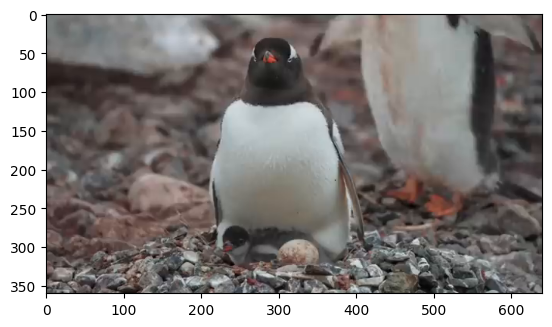

In [ ]:
image = cv2.imread("/content/drive/MyDrive/keyframes/My Solo Trip to Antarctica_frame_094.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
